# Hermite Function Series

A Hermite function series package.

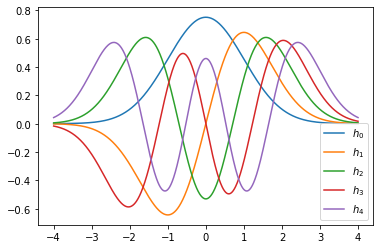

In [1]:
from HermiteFunction import HermiteFunction
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, +4, 1000)
for n in range(5):
    poly = HermiteFunction(n)
    plt.plot(x, poly(x), label='$h_{}$'.format(n))
plt.legend(loc='lower right')
plt.show()

## Usage

This package provides a single class, `HermiteFunction`, to handle Hermite function series.

A series can be initialized in three ways:
 - With the constructor, that takes an non-negative integer to create a pure Hermite function with the given index, or an array-like of coefficients to create a Hermite function series.
 - With the random factory for a Hermite series with random indices up to a given degree.
 - By fitting a data set.

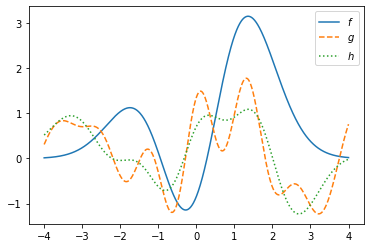

In [2]:
f = HermiteFunction((1, 2, 3))
g = HermiteFunction.random(15)
h = HermiteFunction.fit(x, g(x), 10)
plt.plot(x, f(x), label='$f$'), plt.plot(x, g(x), '--', label='$g$'), plt.plot(x, h(x), ':', label='$h$')
plt.legend()
plt.show()

Methods for functions, simple evaluation and differentiation to an arbitrary degree, are implemented.

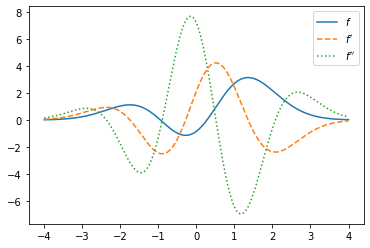

In [3]:
f_p = f.der()
f_pp = f.der(2)
plt.plot(x, f(x), label='$f$'), plt.plot(x, f_p(x), '--', label='$f\'$'), plt.plot(x, f_pp(x), ':', label='$f\'\'$')
plt.legend()
plt.show()

Hilbert space operations are also provided, where the Hermite functions are used as an orthonormal basis of the $L_\mathbb{R}^2$ space. Like vector addition, scalar (or elementwise) multiplication, inner product and norm.

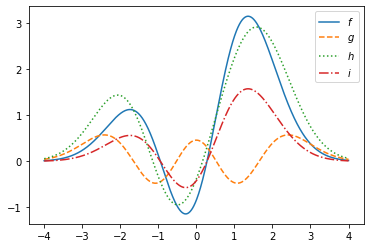

In [4]:
g = HermiteFunction(4)
h = f + g
i = 0.5 * f
plt.plot(x, f(x), label='$f$'), plt.plot(x, g(x), '--', label='$g$'), plt.plot(x, h(x), ':', label='$h$'), plt.plot(x, i(x), '-.', label='$i$')
plt.legend()
plt.show()

In [5]:
f.dot(h), f.norm()

(14, 3.7416573867739413)

But also the more exotic methods, the evaluation of the kinetic energy and finding $h$ to fulfill $fg=h_0h$ for a given $f, g$ (so $h=\frac{fg}{h_0}$).

In [6]:
f.kin(), str(f.prod_reorder(g))

(12.378679656440358,
 '0.0 h_0 + 0.0 h_1 + 7.3 h_2 + 4.0 h_3 + 18.0 h_4 + 4.5 h_5 + 11.6 h_6')

## Proofs

In the following let
$$
    f=\sum_{k=0}^\infty f_k h_k, \ g=\sum_{k=0}^\infty g_k h_k.
$$
where $h_k$ are the Hermite functions, defined by the Hermite polynomials $H_k$:
$$
    h_k(x) = \frac{e^{-\frac{x^2}{2}}}{\sqrt{2^kk!\sqrt{\pi}}} H_k(x)
$$
from [Wikipedia - Hermite functions](https://en.wikipedia.org/wiki/Hermite_polynomials\#Hermite_functions).

### Hilbert space operations

Nothing unusual. All the standard $L_\mathbb{R}^2$ operations.

#### Scalar product

$$
    \langle f|g\rangle_{L_\mathbb{R}^2} = \sum_{k=0}^\infty f_k^*g_k
$$

#### Norm

$$
    ||f||_{L_\mathbb{R}^2} = \sqrt{\sum_{k=0}^\infty |f_k|^2}
$$

#### Scalar multiplication

$$
    af = \sum_{k=0}^\infty af_kh_k
$$

#### Addition

$$
    f+g = \sum_{k=0}^\infty (f_k+g_k)h_k
$$

### Function operations

#### Evaluation

$$
    f(x) = \sum_{k=0}^\infty f_kh_k(x)
$$

#### Differentiation

$$
    \begin{aligned}
        f' &= \sum_k f_k h_k' &&\mid h'_k = \sqrt{\frac{k}{2}}h_{k-1} - \sqrt{\frac{k+1}{2}}h_{k+1} \\
        &= \sum_k f_k \left( \sqrt{\frac{k}{2}}h_{k-1} - \sqrt{\frac{k+1}{2}}h_{k+1} \right) \\
        &= \sum_{k=0}^\infty f_k\sqrt{\frac{k}{2}} h_{k-1} - \sum_{k=0}^\infty f_k\sqrt{\frac{k+1}{2}} h_{k+1} &&\mid k-1 \to k, \ k+1 \to k \\
        &= \sum_{k=-1}^\infty \sqrt{\frac{k+1}{2}}f_{k+1} h_k - \sum_{k=1}^\infty \sqrt{\frac{k}{2}}f_{k-1} h_k &&\mid -0+0 = -\sqrt{\frac{-1+1}{2}}f_{-1+1}h_{-1} + \sqrt{\frac{0}{2}}f_{0-1} h_0 \\
        &= \sum_{k=0}^\infty \sqrt{\frac{k+1}{2}}f_{k+1} h_k - \sum_{k=0}^\infty \sqrt{\frac{k}{2}}f_{k-1} h_k \\
        &= \sum_k \left( \sqrt{\frac{k+1}{2}}f_{k+1} - \sqrt{\frac{k}{2}}f_{k-1} \right) h_k
    \end{aligned} \\
    \begin{pmatrix}
        f'_0 \\
        f'_1 \\
        f'_2 \\
        f'_3 \\
        \vdots
    \end{pmatrix} = \begin{pmatrix}
        0                   & \sqrt{\frac{1}{2}}  & 0                   & 0                  & \\
        -\sqrt{\frac{1}{2}} & 0                   & \sqrt{\frac{2}{2}}  & 0                  & \cdots \\
        0                   & -\sqrt{\frac{2}{2}} & 0                   & \sqrt{\frac{3}{2}} & \\
        0                   & 0                   & -\sqrt{\frac{3}{2}} & 0                  & \\
                            & \vdots              &                     &                    & \ddots
    \end{pmatrix} \begin{pmatrix}
        f_0 \\
        f_1 \\
        f_2 \\
        f_3 \\
        \vdots
    \end{pmatrix}
$$
With $h'_k=\sqrt{\frac{k}{2}}h_{k+1}-\sqrt{\frac{k+1}{2}}h_{k-1}$ from [Wikipedia-Hermite functions](https://en.wikipedia.org/wiki/Hermite_polynomials\#Hermite_functions).

#### Integration

TODO

#### Kinetic energy

$$
    T = -\frac{1}{2}\int_{\mathbb{R}}f^*(x)f''(x)dx = +\frac{1}{2}\int_{\mathbb{R}}|f'(x)|^2dx = \frac{1}{2}||f'||_{L_{\mathbb{R}}^2}^2
$$

#### ''Multiplication''

The product of two Hermite functions is
$$
    \begin{aligned}
        &h_i(x) h_j(x) &&\mid h_j(x) = \frac{e^{-\frac{x^2}{2}}}{\sqrt{2^jj!\sqrt{\pi}}}H_j(x) \\
        &= \frac{e^{-x^2}}{\sqrt{2^{i+j}i!j!\pi}} H_i(x)H_j(x) &&\mid H_j(x) = 2^\frac{j}{2}\tilde{H}_j(\sqrt{2}x) \\
        &= \frac{e^{-x^2}}{\sqrt{2^{i+j} i!j! \pi}} 2^\frac{i+j}{2} \tilde{H}_i(\sqrt{2}x) \tilde{H}_j(\sqrt{2}x) &&\mid \tilde{H}_i\tilde{H}_j = \sum_{k=0}^{\min\{i, j\}}k!\binom{i}{k}\binom{j}{k}\tilde{H}_{i+j-2k} \\
        &= \frac{e^{-x^2}}{\sqrt{2^{i+j}i!j!\pi}} 2^\frac{i+j}{2} \sum_{k=0}^{\min\{i, j\}} k!\binom{i}{k}\binom{j}{k} \tilde{H}_{i+j-2k}(\sqrt{2}x) &&\mid \cdot1=2^{k-k} \\
        &= \frac{e^{-x^2}}{\sqrt{2^{i+j}i!j!\pi}}\sum_{j=0}^{\min\{i, j\}} 2^kk!\binom{i}{k}\binom{j}{k}2^\frac{i+j-2k}{2} \tilde{H}_{i+j-2k}(\sqrt{2}x) &&\mid H_j(x)=2^\frac{j}{2} \tilde{H}_j(\sqrt{2}x) \\
        &= \frac{e^{-x^2}}{\sqrt{2^{i+j}i!j!\pi}}\sum_{k=0}^{\min\{i, j\}} 2^kk!\binom{i}{k}\binom{j}{k} H_{i+j-2k}(x) &&\mid h_j(x)=\frac{e^{-\frac{x^2}{2}}}{\sqrt{2^jj!\sqrt{\pi}}} H_j(x) \\
        &= \frac{e^{-\frac{x^2}{2}}}{\sqrt{i!j! \sqrt{\pi}}}\sum_{j=0}^{\min\{i, j\}} k!\binom{i}{k}\binom{j}{k}\sqrt{(i+j-2k)!} h_{i+j-2k}(x) &&\mid h_0(x) = \frac{e^{-\frac{x^2}{2}}}{\sqrt[4]{\pi}} \\
        &= h_0(x)\sum_{k=0}^{\min\{i,j\}} k!\binom{i}{k}\binom{j}{k}\sqrt{\frac{(i+j-2k)!}{i!j!}} h_{i+j-2k}(x) \\
        &= h_0(x)\sum_{k=0}^{\min\{i,j\}} \frac{\sqrt{i!j!(i+j-2k)!}}{k!(i-k)!(j-k)!} h_{i+j-2k}(x)
    \end{aligned}
$$
With
 - $h_j(x)=\frac{e^{-\frac{x^2}{2}}}{\sqrt{2^jj!\sqrt{\pi}}}H_j(x)$, $H_j(x)=2^\frac{j}{2} \tilde{H}_j(\sqrt{2}x)$ and $h_0(x)=\frac{e^{-\frac{x^2}{2}}}{\sqrt[4]{\pi}}$ from [Wikipedia-Hermite functions](https://en.wikipedia.org/wiki/Hermite_polynomials\#Hermite_functions),
 - $H_j(x)=2^\frac{j}{2}\tilde{H}_j(\sqrt{2}x)$ from [Wikipedia-Hermite polynomials](https://en.wikipedia.org/wiki/Hermite_polynomials\#Definition),
 - $\tilde{H}_i\tilde{H}_j=\sum_{k=0}^{\min\{i, j\}}k!\binom{i}{k}\binom{j}{k}\tilde{H}_{i+j-2k}$ from [some file I found on the internet](https://ncatlab.org/nlab/files/HermitePolynomialsAndHermiteFunctions.pdf) eq. A.8.

Therefore follows for the products of Hermite series:
$$
    \begin{aligned}
        fg &= \sum_if_ih_i \sum_jg_jh_j = \sum_{i, j}f_ig_j h_ih_j \\
        &\qquad\mid h_ih_j = h_0\sum_{k=0}^{\min\{i,j\}} k!\binom{i}{k}\binom{j}{k}\sqrt{\frac{(i+j-2k)!}{i!j!}} h_{i+j-2k} \\
        &= h_0 \sum_{i, j} f_ig_j \sum_{k=0}^{\min\{i,j\}} k!\binom{i}{k}\binom{j}{k}\sqrt{\frac{(i+j-2k)!}{i!j!}} h_{i+j-2k} \\
        &\vdots \\
        &\text{(some steps I am not able to prove)} \\
        &\vdots \\
        &= h_0 \sum_{b=0}^\infty \sum_{n=b}^\infty \sum_{d=-b, 2}^{+b} f_{\frac{n-d}{2}}g_{\frac{n+d}{2}} \left(\frac{n-b}{2}\right)!\binom{\frac{n-d}{2}}{\frac{n-b}{2}}\binom{\frac{n+d}{2}}{\frac{n-b}{2}}\sqrt{\frac{\left(\frac{n-b}{2}\right)!}{\left(\frac{n-d}{2}\right)!\left(\frac{n+d}{2}\right)!}} h_b \\
        &= h_0 \sum_{b=0}^\infty \sum_{n=b}^\infty \sum_{d=0}^b f_{\frac{n+b}{2}-d}g_{\frac{n-b}{2}+d} \left(\frac{n-b}{2}\right)!\binom{\frac{n+b}{2}-d}{\frac{n-b}{2}}\binom{\frac{n-b}{2}+d}{\frac{n-b}{2}}\sqrt{\frac{\left(\frac{n-b}{2}\right)!}{\left(\frac{n+b}{2}-d\right)!\left(\frac{n-b}{2}+d\right)!}} h_b
    \end{aligned}
$$

## Trivial tests

In [7]:
# Addition
for n in range(100):
    f = HermiteFunction.random(20)
    g = HermiteFunction.random(np.random.randint(0, 20)) #test different sized
    assert np.allclose((f+g)(x), f(x)+g(x))

# Scalar multiplication
for n in range(100):
    f = HermiteFunction.random(20)
    c = np.random.rand()
    assert np.allclose((c*f)(x), c*(f(x)))

### Derivative

In [8]:
def der_num(x, y, n=1):
    """Nummerical differentiation."""
    for _ in range(n):
        y = np.diff(y) / np.diff(x)
        x = (x[1:] + x[:-1]) / 2
    return x, y

for i in range(100):
    f = HermiteFunction(20)
    assert np.allclose(f.der()(der_num(x, f(x))[0]), der_num(x, f(x))[1], atol=1e-3)

### Products

In [9]:
from math import sqrt
from scipy.special import binom

for _ in range(100):
    f, g = HermiteFunction.random(11), HermiteFunction.random(14)
    assert np.allclose(f(x)*g(x), HermiteFunction(0)(x)*((f.prod_reorder(g))(x)), atol=1e-4)

### Kinetic energy

In [10]:
def kin_num(x, y):
    '''Nummeric kinetic energy.'''
    x, y_lapl = der_num(x, y, 2)
    y = (y[2:] + 2*y[1:-1] + y[:-2]) / 4 #mid y twice to broadcast to y_lapl
    return -np.trapz(y*y_lapl, x) / 2

for _ in range(100):
    f = HermiteFunction.random(5)
    assert np.allclose(f.kin(), kin_num(x, f(x)), atol=1e-2)

### Fitting

In [11]:
for _ in range(100):
    f = HermiteFunction.random(20)
    y = f(x)
    fit = HermiteFunction.fit(x, y, 20)
    assert np.allclose(f.coef, fit.coef)